# Importing Packages and Reading file as DataFrame

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr 

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz 
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score
from sklearn.metrics import precision_score,classification_report,roc_auc_score,precision_score

from IPython.display import Image  
from sklearn import tree 
from os import system 

from statistics import median,mean

import warnings
warnings.filterwarnings('ignore')

In [2]:
DataFrame = pd.read_csv('bank-full .csv')
DataFrame.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
DataFrame.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


# Exploratory Data Analysis

In [4]:
print('\033[1m''Number of rows in dataframe',DataFrame.shape[0]) 
print('\033[1m''Number of features in dataframe',DataFrame.shape[1]) 

Number of rows in dataframe 45211
Number of features in dataframe 17


## Data type of each attribute

In [5]:
DataFrame.dtypes.to_frame('Datatypes of attributes').T 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of attributes,int64,object,object,object,object,int64,object,object,object,int64,object,int64,int64,int64,int64,object,object


In [6]:
DataFrame[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = DataFrame[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)
DataFrame.dtypes.to_frame('Datatypes of attributes').T 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of attributes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


## Checking the presence of missing values

In [7]:
DataFrame.isnull().sum().to_frame('Presence of missing values').T 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Presence of missing values,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
DataFrame['poutcome'].value_counts() 

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [9]:
DataFrame['contact'].value_counts() 

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [10]:
DataFrame['education'].value_counts() 

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [11]:
DataFrame['job'].value_counts() 

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

## Summary of numerical attribute

In [12]:
DataFrame.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [13]:
DataFrame.loc[DataFrame['pdays'] == 999]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target


## Distribution of numerical columns.

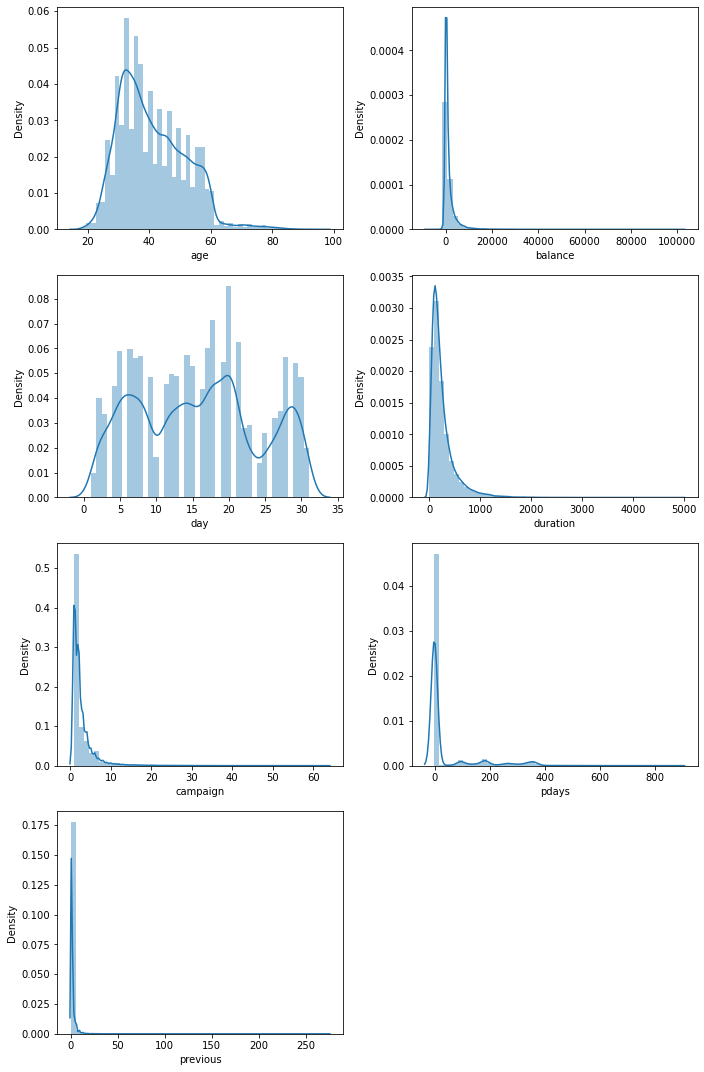

In [14]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 15)) 
axe = axe.flatten() 
sns.distplot(DataFrame['age'],ax=axe[0]) 
sns.distplot(DataFrame['balance'],ax=axe[1]) 
sns.distplot(DataFrame['day'],ax=axe[2]) 
sns.distplot(DataFrame['duration'],ax=axe[3]) 
sns.distplot(DataFrame['campaign'],ax=axe[4]) 
sns.distplot(DataFrame['pdays'],ax=axe[5]) 
sns.distplot(DataFrame['previous'],ax=axe[6]) 
fig.tight_layout() 
fig.show() 
axe.flat[-1].set_visible(False)

## Distribution of Categorical columns.

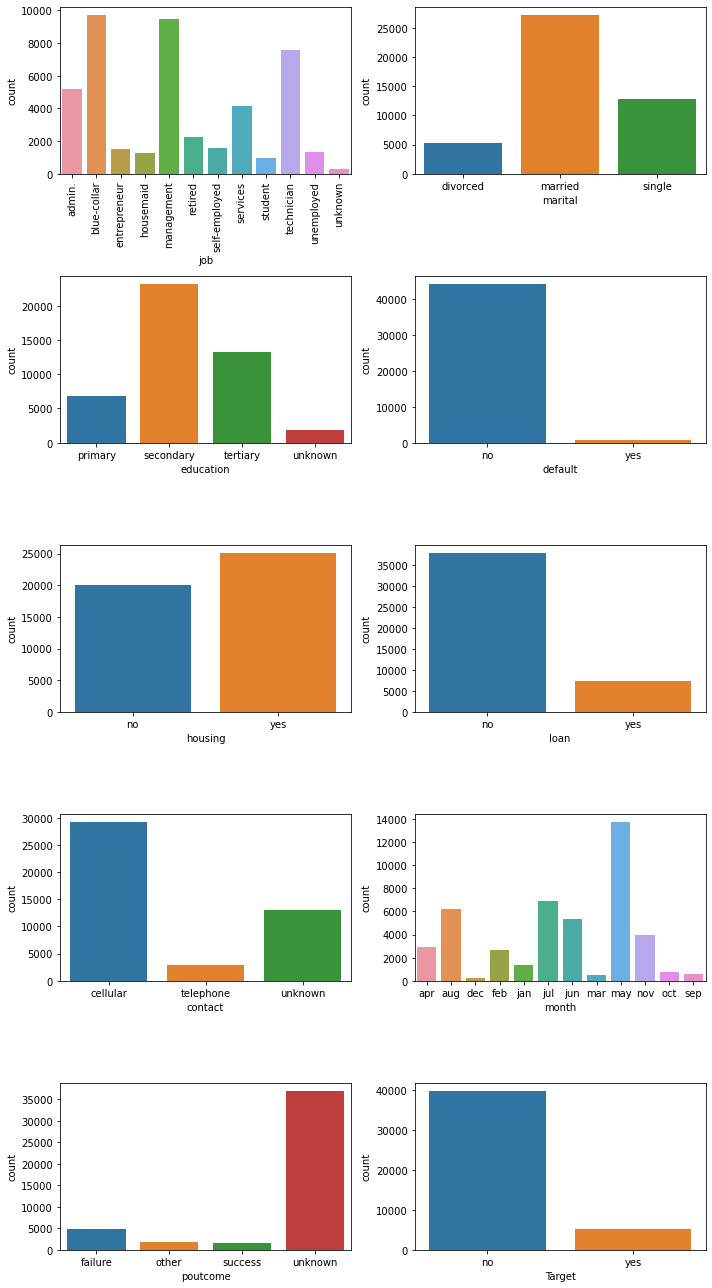

In [15]:
fig, axe = plt.subplots(nrows=5, ncols=2, figsize=(10, 18)) 
axe = axe.flatten() #to flatten subplot index positions
plot=sns.countplot(x=DataFrame['job'],data=DataFrame,ax=axe[0]) #Countplot of 'job' 
plt.setp(plot.get_xticklabels(), rotation=90)
sns.countplot(x=DataFrame['marital'],data=DataFrame,ax=axe[1]) #Countplot of 'marital' 
sns.countplot(x=DataFrame['education'],data=DataFrame,ax=axe[2]) #Countplot of 'education' 
sns.countplot(x=DataFrame['default'],data=DataFrame,ax=axe[3]) #Countplot of 'default' 
sns.countplot(x=DataFrame['housing'],data=DataFrame,ax=axe[4]) #Countplot of 'housing' 
sns.countplot(x=DataFrame['loan'],data=DataFrame,ax=axe[5]) #Countplot of 'loan' 
sns.countplot(x=DataFrame['contact'],data=DataFrame,ax=axe[6]) #Countplot of 'contact' 
sns.countplot(x=DataFrame['month'],data=DataFrame,ax=axe[7]) #Countplot of 'month' 
sns.countplot(x=DataFrame['poutcome'],data=DataFrame,ax=axe[8]) #Countplot of 'poutcome' 
sns.countplot(x=DataFrame['Target'],data=DataFrame,ax=axe[9]) #Countplot of 'target' 
fig.tight_layout() #for arranging the plots
fig.show() #display plots



## Measure of skewness of numerical columns

In [16]:
DataFrame.skew().to_frame('Skewness measure').T

,age,balance,day,duration,campaign,pdays,previous
Skewness measure,0.684818,8.360308,0.093079,3.144318,4.89865,2.615715,41.846454


## Checking the presence of outliers 

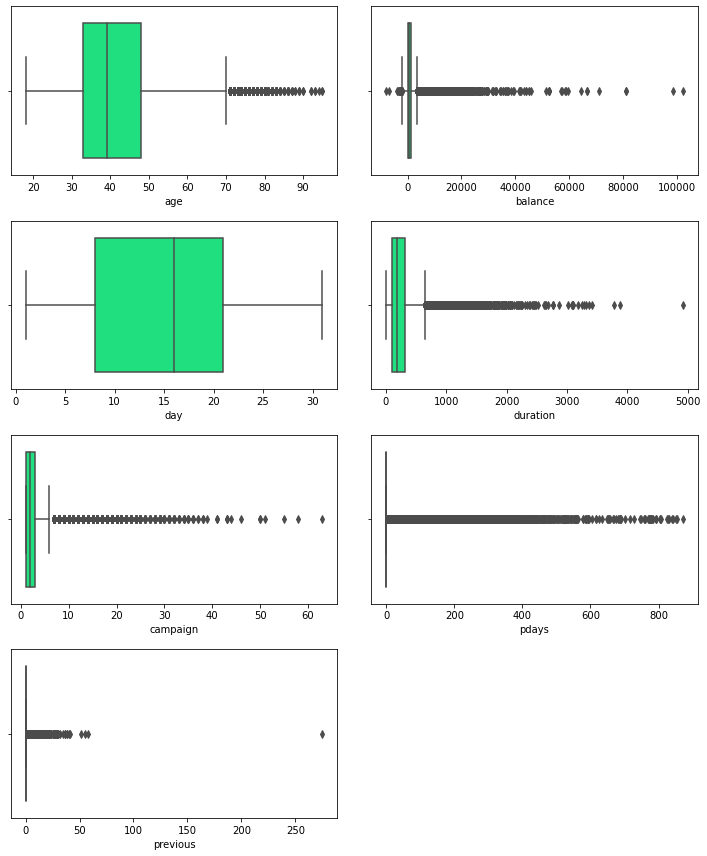

In [17]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axe = axe.flatten()
sns.boxplot(x='age',data=DataFrame,color='springgreen',ax=axe[0]) 
sns.boxplot(x='balance',data=DataFrame,color='springgreen',ax=axe[1])
sns.boxplot(x='day',data=DataFrame,color='springgreen',ax=axe[2]) 
sns.boxplot(x='duration',data=DataFrame,color='springgreen',ax=axe[3]) 
sns.boxplot(x='campaign',data=DataFrame,color='springgreen',ax=axe[4]) 
sns.boxplot(x='pdays',data=DataFrame,color='springgreen',ax=axe[5]) 
sns.boxplot(x='previous',data=DataFrame,color='springgreen',ax=axe[6]) 
fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

## Distribution of Target column

In [18]:
DataFrame['Target'].value_counts().to_frame('Target column distriution') # Value counts of Target column

,Target column distriution
no,39922
yes,5289


# Data Preprocessing:

## Label Encoding of variables

In [19]:
df_2 = DataFrame.copy()
encoder = LabelEncoder() 
df_2['default'] = encoder.fit_transform(df_2['default']).astype(int) 
df_2['marital'] = encoder.fit_transform(df_2['marital']).astype(int) 
df_2['loan'] = encoder.fit_transform(df_2['loan']).astype(int) 
df_2['housing'] = encoder.fit_transform(df_2['housing']).astype(int) 
df_2['Target'] = encoder.fit_transform(df_2['Target']).astype(int)
df_2['month'] = encoder.fit_transform(df_2['month']).astype(int)
df_2['poutcome'] = encoder.fit_transform(df_2['poutcome']).astype(int)
df_2['education'] = encoder.fit_transform(df_2['education']).astype(int)
df_2.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,2143,1,0,unknown,5,8,261,1,-1,0,3,0
1,44,technician,2,1,0,29,1,0,unknown,5,8,151,1,-1,0,3,0
2,33,entrepreneur,1,1,0,2,1,1,unknown,5,8,76,1,-1,0,3,0
3,47,blue-collar,1,3,0,1506,1,0,unknown,5,8,92,1,-1,0,3,0
4,33,unknown,2,3,0,1,0,0,unknown,5,8,198,1,-1,0,3,0


## Checking & modifying datatypes after Label Encoding

In [20]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  int32   
 3   education  45211 non-null  int32   
 4   default    45211 non-null  int32   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int32   
 7   loan       45211 non-null  int32   
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  int32   
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  int32   
 16  Target     45211 non-null  int32   
dtypes: category(2), int32(8), int64(7)
memory usage: 3.9 MB


In [21]:
df_2[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = df_2[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)


In [22]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


## Handeling Outliers with mean replacement

Boxplots after handeling outliers


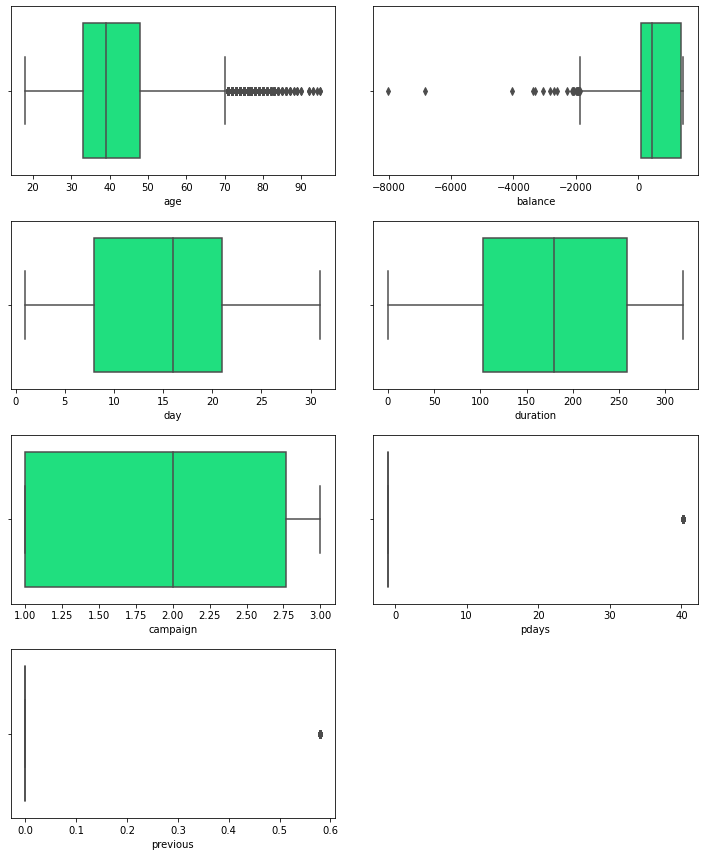

In [23]:
meanbal = float(df_2['balance'].mean())
df_2['balance'] = np.where(df_2['balance'] >np.percentile(df_2['balance'], 75), meanbal,df_2['balance']) 

meandur = float(df_2['duration'].mean())
df_2['duration'] = np.where(df_2['duration'] >np.percentile(df_2['duration'], 75), meandur,df_2['duration'])

meancam = float(df_2['campaign'].mean())
df_2['campaign'] = np.where(df_2['campaign'] >np.percentile(df_2['campaign'], 75), meancam,df_2['campaign'])

meanpd = float(df_2['pdays'].mean()) 
df_2['pdays'] = np.where(df_2['pdays'] >np.percentile(df_2['pdays'], 75), meanpd,df_2['pdays'])

meanpr = float(df_2['previous'].mean())
df_2['previous'] = np.where(df_2['previous'] >np.percentile(df_2['previous'], 75),meanpr ,df_2['previous'])



fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axe = axe.flatten()
sns.boxplot(x='age',data=df_2,color='springgreen',ax=axe[0])
sns.boxplot(x='balance',data=df_2,color='springgreen',ax=axe[1]) 
sns.boxplot(x='day',data=df_2,color='springgreen',ax=axe[2])
sns.boxplot(x='duration',data=df_2,color='springgreen',ax=axe[3])
sns.boxplot(x='campaign',data=df_2,color='springgreen',ax=axe[4]) 
sns.boxplot(x='pdays',data=df_2,color='springgreen',ax=axe[5])
sns.boxplot(x='previous',data=df_2,color='springgreen',ax=axe[6])
fig.tight_layout() 
fig.show() 
axe.flat[-1].set_visible(False)
print('\033[1m''Boxplots after handeling outliers')

In [24]:
df_2 = pd.get_dummies(df_2,columns=['housing','default','loan','poutcome'])

## Corr plot of all features

<AxesSubplot:>

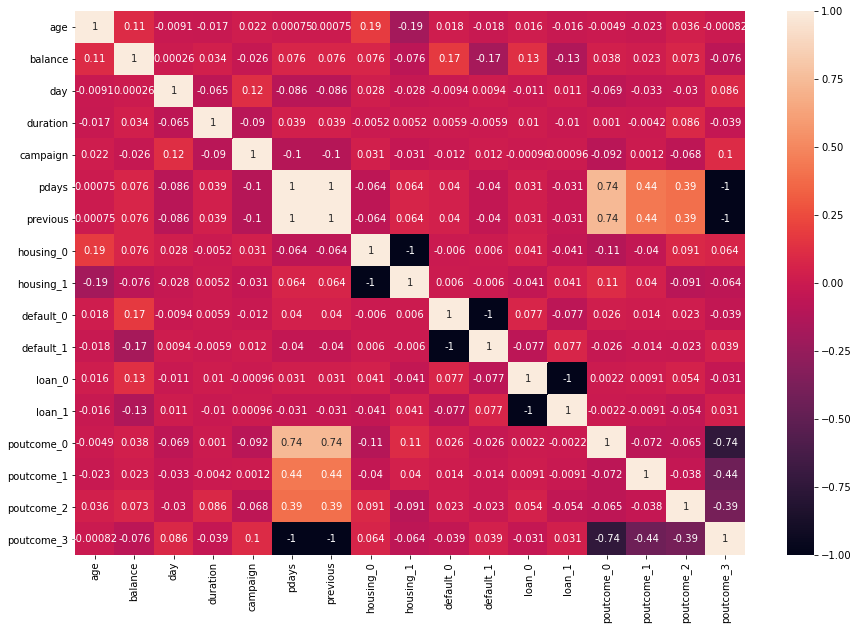

In [25]:
plt.figure(figsize=(15,10)) 
sns.heatmap(df_2.corr(),annot=True) 

In [26]:
df_2 = df_2.drop(['job','education','contact','duration','pdays','day','month'],axis=1) 
df_2.head()

,age,marital,balance,campaign,previous,Target,housing_0,housing_1,default_0,default_1,loan_0,loan_1,poutcome_0,poutcome_1,poutcome_2,poutcome_3
0,58,1,1362.272058,1.0,0.0,0,0,1,1,0,1,0,0,0,0,1
1,44,2,29.000000,1.0,0.0,0,0,1,1,0,1,0,0,0,0,1
2,33,1,2.000000,1.0,0.0,0,0,1,1,0,0,1,0,0,0,1
3,47,1,1362.272058,1.0,0.0,0,0,1,1,0,1,0,0,0,0,1
4,33,2,1.000000,1.0,0.0,0,1,0,1,0,1,0,0,0,0,1


# Pairplot of features

# Train Test Split (70:30)

In [27]:
X = df_2.drop('Target',axis=1) 
y = df_2['Target'] 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1) 

# Scaling of columns

In [28]:
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Models:
## Logistic Regression:

In [29]:
logic_r = LogisticRegression(solver='liblinear') 
logic_r.fit(X_train_scaled,y_train) 
y_pred = logic_r.predict(X_test_scaled) 

In [30]:
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_pred))
LR_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy of Logistic Regression :{:.2f}'.format(LR_accuracy)) 
print('\n Classification Report\n',classification_report(y_test,y_pred))

Confusion Matrix
 [[11882   131]
 [ 1290   261]]
Accuracy of Logistic Regression :0.90

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.67      0.17      0.27      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.88      0.90      0.87     13564



## Naive Bayes

In [31]:
NB = GaussianNB()  
NB.fit(X_train_scaled,y_train) 
y_predi = NB.predict(X_test_scaled) 

In [32]:
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_predi)) 
NB_accuracy = accuracy_score(y_test,y_predi)
print('Accuracy of Naive Bayes :{:.2f}'.format(NB_accuracy)) 
print('\n Classification Report\n',classification_report(y_test,y_predi)) 


Confusion Matrix
 [[10701  1312]
 [  997   554]]
Accuracy of Naive Bayes :0.83

 Classification Report
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     12013
           1       0.30      0.36      0.32      1551

    accuracy                           0.83     13564
   macro avg       0.61      0.62      0.61     13564
weighted avg       0.84      0.83      0.84     13564



## K-Nearest Neighbor

In [33]:
# k=3
knn = KNeighborsClassifier(n_neighbors = 3)  
knn.fit(X_train_scaled,y_train)
y_predict = knn.predict(X_test_scaled) 

print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_predi)) 
KNN_accuracy = accuracy_score(y_test,y_predict)
print('Accuracy of KNN :{:.2f}'.format(KNN_accuracy)) 
print('\n Classification Report\n',classification_report(y_test,y_predi)) 

Confusion Matrix
 [[10701  1312]
 [  997   554]]
Accuracy of KNN :0.87

 Classification Report
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     12013
           1       0.30      0.36      0.32      1551

    accuracy                           0.83     13564
   macro avg       0.61      0.62      0.61     13564
weighted avg       0.84      0.83      0.84     13564



optimal k is 13


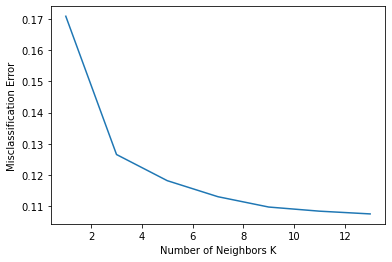

In [34]:
oddList = list(np.arange(1,15)) 
neighbors = list(filter(lambda x: x % 2 != 0, oddList)) 
accuracy_list = []
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaled,y_train)  
    y_pred = knn.predict(X_test_scaled) 
    accuracy_s = accuracy_score(y_test,y_pred) 
    accuracy_list.append(accuracy_s)  
    
MSE=[1 - j for j in accuracy_list] 

optimal = neighbors[MSE.index(min(MSE))]
print('optimal k is',optimal) 

plt.plot(neighbors,MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error') 
plt.show()

## SVC

In [35]:
svc = SVC() 
svc.fit(X_train_scaled,y_train)
predicted_svc = svc.predict(X_test_scaled) 

print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_svc))
SVC_accuracy = accuracy_score(y_test,predicted_svc) 
print('Accuracy of SVC :',SVC_accuracy)
print('\n Classification Report\n',classification_report(y_test,predicted_svc)) 


Confusion Matrix
 [[11872   141]
 [ 1273   278]]
Accuracy of SVC : 0.8957534650545562

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.18      0.28      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.88      0.90      0.87     13564



# Ensemble Models

## Decision Tree

In [36]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)
predicted_DT = dTree.predict(X_test)  

print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_DT)) 
DT_accuracy = accuracy_score(y_test,predicted_DT)
print('Accuracy of Decision Tree :{:.2f}'.format(DT_accuracy)) 
print('\n Classification Report\n',classification_report(y_test,predicted_DT)) 

Confusion Matrix
 [[11028   985]
 [ 1198   353]]
Accuracy of Decision Tree :0.84

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     12013
           1       0.26      0.23      0.24      1551

    accuracy                           0.84     13564
   macro avg       0.58      0.57      0.58     13564
weighted avg       0.83      0.84      0.83     13564



## Feature importance test for decision tree

In [37]:
xvar = df_2.drop('Target', axis=1) 
feature_cols = xvar.columns 
feat_importance = dTree.tree_.compute_feature_importances(normalize=False) 

feat_imp_dict = dict(zip(feature_cols, dTree.feature_importances_)) 
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False) 

,0
balance,0.448673
age,0.245611
poutcome_2,0.118614
campaign,0.074209
marital,0.041472
loan_0,0.014955
loan_1,0.013247
poutcome_3,0.010255
housing_0,0.009578
poutcome_0,0.007231


## Pruning of Decision Tree

In [38]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train) 
predicted_DTR = dTreeR.predict(X_test) 

print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_DTR)) 
DTR_accuracy = accuracy_score(y_test,predicted_DTR)
print('Accuracy of Decision Tree with Regularization:{:.2f}'.format(DTR_accuracy)) 
print('\n Classification Report\n',classification_report(y_test,predicted_DTR)) 


Confusion Matrix
 [[11850   163]
 [ 1254   297]]
Accuracy of Decision Tree with Regularization:0.90

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.65      0.19      0.30      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.90      0.87     13564



In [39]:
feat_importance = dTreeR.tree_.compute_feature_importances(normalize=False) 


feat_imp_dict = dict(zip(feature_cols, dTreeR.feature_importances_)) 
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index') 
feat_imp.sort_values(by=0, ascending=False)

,0
poutcome_2,0.779136
age,0.134471
housing_0,0.060037
housing_1,0.019794
marital,0.004305
balance,0.002257
campaign,0.000000
previous,0.000000
default_0,0.000000
default_1,0.000000


## Bagging

In [40]:
bagc = BaggingClassifier(base_estimator=dTree, n_estimators=500,random_state=1) 
bagc = bagc.fit(X_train, y_train) 
predicted_BAG = bagc.predict(X_test)

print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_BAG)) 
BAG_accuracy = accuracy_score(y_test,predicted_BAG)
print('Accuracy of Decision Tree :{:.2f}'.format(BAG_accuracy)) 
print('\n Classification Report\n',classification_report(y_test,predicted_BAG))

Confusion Matrix
 [[11605   408]
 [ 1222   329]]
Accuracy of Decision Tree :0.88

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.97      0.93     12013
           1       0.45      0.21      0.29      1551

    accuracy                           0.88     13564
   macro avg       0.68      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



## Adaptive Boosting

In [41]:
adab = AdaBoostClassifier(n_estimators=50, random_state=1) 
adab = adab.fit(X_train, y_train)
predicted_ADA = adab.predict(X_test) 

print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_ADA)) 
ADA_accuracy = accuracy_score(y_test,predicted_ADA)
print('Accuracy of KNN :{:.2f}'.format(ADA_accuracy))
print('\n Classification Report\n',classification_report(y_test,predicted_ADA)) 

Confusion Matrix
 [[11877   136]
 [ 1298   253]]
Accuracy of KNN :0.89

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.65      0.16      0.26      1551

    accuracy                           0.89     13564
   macro avg       0.78      0.58      0.60     13564
weighted avg       0.87      0.89      0.87     13564



## Gradient boosting

In [42]:
gradb = GradientBoostingClassifier(n_estimators = 100,random_state=1) 
gradb = gradb.fit(X_train, y_train)
predicted_GRAD = gradb.predict(X_test) 

print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_GRAD))
GRAD_accuracy = accuracy_score(y_test,predicted_GRAD)
print('Accuracy of KNN :{:.2f}'.format(GRAD_accuracy))
print('\n Classification Report\n',classification_report(y_test,predicted_GRAD)) 

Confusion Matrix
 [[11864   149]
 [ 1277   274]]
Accuracy of KNN :0.89

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.65      0.18      0.28      1551

    accuracy                           0.89     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.87      0.89      0.87     13564



## Random Forest

In [43]:
#n=100
randf = RandomForestClassifier(n_estimators = 100, random_state=1, max_features=3)
randf = randf.fit(X_train, y_train) 
predicted_RAN = randf.predict(X_test)

print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_RAN ))
RAN_accuracy = accuracy_score(y_test,predicted_RAN )
print('Accuracy of KNN :{:.2f}'.format(RAN_accuracy))
print('\n Classification Report\n',classification_report(y_test,predicted_RAN )) 

Confusion Matrix
 [[11552   461]
 [ 1221   330]]
Accuracy of KNN :0.88

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     12013
           1       0.42      0.21      0.28      1551

    accuracy                           0.88     13564
   macro avg       0.66      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



In [44]:
randf = RandomForestClassifier(n_estimators = 500, random_state=1, max_features=5) 
randf = randf.fit(X_train, y_train) 
predicted_RANN = randf.predict(X_test)


print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_RANN))
RANN_accuracy = accuracy_score(y_test,predicted_RANN)
print('Accuracy of KNN :{:.2f}'.format(RANN_accuracy)) 
print('\n Classification Report\n',classification_report(y_test,predicted_RANN)) 

Confusion Matrix
 [[11576   437]
 [ 1222   329]]
Accuracy of KNN :0.88

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     12013
           1       0.43      0.21      0.28      1551

    accuracy                           0.88     13564
   macro avg       0.67      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



# Models with accuracy scores

In [45]:
Scores = [('Naive bayes', NB_accuracy),
      ('KNN', KNN_accuracy),
      ('Logistic Regression', LR_accuracy),
      ('SVC', SVC_accuracy ),
      ('Decision Tree',DT_accuracy),
      ('Decision Tree with Regularization',DTR_accuracy),
      ('Bagging',BAG_accuracy),
      ('Adaptive Boosting',ADA_accuracy),
      ('Gradient Boosting',GRAD_accuracy),
      ('Random Forest N=100',RAN_accuracy),
      ('Random Forest N=500',RANN_accuracy)] 
Scores = pd.DataFrame(Scores,columns=['Model','Accuracy score']) 

print('\033[1m''Current Scores with Outliers replaced with mean:')
Scores.sort_values(by='Accuracy score',ascending=False) 

Current Scores with Outliers replaced with mean:


,Model,Accuracy score
3,SVC,0.895753
5,Decision Tree with Regularization,0.895532
2,Logistic Regression,0.895237
8,Gradient Boosting,0.894869
7,Adaptive Boosting,0.894279
6,Bagging,0.879829
10,Random Forest N=500,0.877691
9,Random Forest N=100,0.875995
1,KNN,0.873489
4,Decision Tree,0.839059


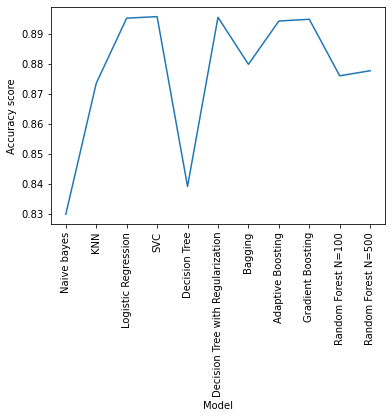

In [46]:
sns.lineplot(x=Scores['Model'],y=Scores['Accuracy score'],data=Scores,markers=True, dashes=False)
plt.xticks(rotation=90)
plt.show()